In [209]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0'

Data Preparation and Load Data

In [210]:
weight = 0.6
bias = 2

X = torch.arange(start=0, end=100, step=0.001).unsqueeze(dim=1)
Y = weight * X + bias

print("Shape of X: ", X.shape,"Shape of Y: ",  Y.shape, )

for i in range(len(X[:10])):
    print(X[i], Y[i])

Shape of X:  torch.Size([100000, 1]) Shape of Y:  torch.Size([100000, 1])
tensor([0.]) tensor([2.])
tensor([0.0010]) tensor([2.0006])
tensor([0.0020]) tensor([2.0012])
tensor([0.0030]) tensor([2.0018])
tensor([0.0040]) tensor([2.0024])
tensor([0.0050]) tensor([2.0030])
tensor([0.0060]) tensor([2.0036])
tensor([0.0070]) tensor([2.0042])
tensor([0.0080]) tensor([2.0048])
tensor([0.0090]) tensor([2.0054])


Splitting Train and Test Data

In [211]:
train_len = int(0.85 * len(X))
print("Training Size: ", train_len)

train_X, train_y = X[:train_len], Y[:train_len]
test_X, test_Y = X[train_len:], Y[train_len:]

train_X.shape, test_X.shape

Training Size:  85000


(torch.Size([85000, 1]), torch.Size([15000, 1]))

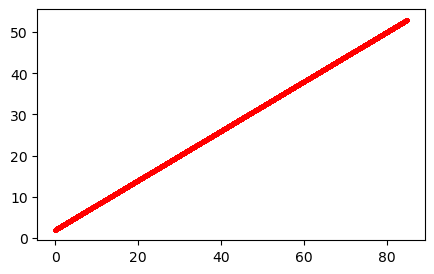

In [212]:
def plotData(X, Y, c = 'b'):
    plt.figure(figsize=(5, 3))
    plt.scatter(X, Y, s = 3, c = c )
    plt.show()

plotData(train_X, train_y, 'r')

Building the Model

In [213]:
class LinearRegression(nn.Module):
    def __init__(self, ):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(0.01 * torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias


In [214]:
torch.manual_seed(42)

model_test = LinearRegression()

print("Parameters: ", list(model_test.parameters()))
print("State Dict: ", model_test.state_dict())


Parameters:  [Parameter containing:
tensor([0.0034], requires_grad=True), Parameter containing:
tensor([0.0013], requires_grad=True)]
State Dict:  OrderedDict([('weights', tensor([0.0034])), ('bias', tensor([0.0013]))])


In [215]:
# predicting value without training the model

with torch.inference_mode():
    y_pred = model_test(test_X)

# We can do the same this using
# with torch.no_grad():
#     y_pred = model_test(test_X)

y_pred[:10], test_Y[:10]

(tensor([[0.2875],
         [0.2875],
         [0.2875],
         [0.2875],
         [0.2875],
         [0.2875],
         [0.2875],
         [0.2875],
         [0.2875],
         [0.2875]]),
 tensor([[53.0000],
         [53.0006],
         [53.0012],
         [53.0018],
         [53.0024],
         [53.0030],
         [53.0036],
         [53.0042],
         [53.0048],
         [53.0054]]))

Training the Model

In [216]:
torch.manual_seed(42)
lossFn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_test.parameters(), lr=0.001)

epochs = 100

for each_epoch in range(epochs):
    model_test.train()

    y_pred = model_test(train_X)

    loss = lossFn(y_pred, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_test.eval()
    with torch.inference_mode():
        y_pred = model_test(test_X)
        test_loss = lossFn(y_pred, test_Y)
    if each_epoch % 20 == 0:
        print(f" Epoch: {each_epoch}, Train loss is {loss.item()} ans test loss is {test_loss}")
        print([model_test.state_dict()])


 Epoch: 0, Train loss is 27.35531997680664 ans test loss is 53.254791259765625
[OrderedDict([('weights', tensor([0.0459])), ('bias', tensor([0.0023]))])]
 Epoch: 20, Train loss is 0.901040256023407 ans test loss is 2.822970151901245
[OrderedDict([('weights', tensor([0.6519])), ('bias', tensor([0.0186]))])]
 Epoch: 40, Train loss is 0.918042004108429 ans test loss is 3.1232690811157227
[OrderedDict([('weights', tensor([0.6551])), ('bias', tensor([0.0256]))])]
 Epoch: 60, Train loss is 0.9168953895568848 ans test loss is 3.153017044067383
[OrderedDict([('weights', tensor([0.6554])), ('bias', tensor([0.0326]))])]
 Epoch: 80, Train loss is 0.9154736399650574 ans test loss is 3.1788201332092285
[OrderedDict([('weights', tensor([0.6556])), ('bias', tensor([0.0396]))])]


In [218]:
print([model_test.state_dict()])
# with torch.no_grad():
#     y_pred = model_test(test_Y)

# y_pred[:10], test_Y[:10]

[OrderedDict([('weights', tensor([0.6247])), ('bias', tensor([0.0457]))])]
